In [17]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("../DataSets/fitness_tracker_dataset.csv")

print("Path to dataset files:", data)


Path to dataset files:         user_id        date  steps  calories_burned  distance_km  \
0           468  2023-01-01   4530          2543.02        16.10   
1           879  2023-01-01  11613          1720.76         8.10   
2           152  2023-01-01  27335          1706.35         3.57   
3           311  2023-01-01  13459          2912.38         6.41   
4           759  2023-01-01  15378          3344.51        17.88   
...         ...         ...    ...              ...          ...   
999995      294  2025-09-26  21883          1711.42         4.62   
999996      114  2025-09-26  15451          3961.63         1.93   
999997       85  2025-09-26  17912          3604.77         5.81   
999998      109  2025-09-26  10072          2724.34         7.42   
999999      893  2025-09-26  29516          3713.99         6.70   

        active_minutes  sleep_hours  heart_rate_avg workout_type  \
0                  613          1.5             176      Walking   
1                  352  

# **Load Dataset and EDA**

In [18]:
data.head()

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood
0,468,2023-01-01,4530,2543.02,16.10,613,1.5,176,Walking,Clear,Park,Tired
1,879,2023-01-01,11613,1720.76,8.10,352,6.3,128,Cycling,Fog,Park,Happy
2,152,2023-01-01,27335,1706.35,3.57,236,6.7,134,Yoga,Snow,Park,Neutral
3,311,2023-01-01,13459,2912.38,6.41,1329,11.6,116,Swimming,Rain,Office,Tired
4,759,2023-01-01,15378,3344.51,17.88,52,7.4,84,Swimming,Rain,Office,Neutral


In [19]:
# dataset information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1000000 non-null  int64  
 1   date                1000000 non-null  object 
 2   steps               1000000 non-null  int64  
 3   calories_burned     1000000 non-null  float64
 4   distance_km         1000000 non-null  float64
 5   active_minutes      1000000 non-null  int64  
 6   sleep_hours         1000000 non-null  float64
 7   heart_rate_avg      1000000 non-null  int64  
 8   workout_type        856880 non-null   object 
 9   weather_conditions  1000000 non-null  object 
 10  location            1000000 non-null  object 
 11  mood                1000000 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 91.6+ MB
None


In [20]:
# Descriptive statistics
print(data.describe())

              user_id           steps  calories_burned     distance_km  \
count  1000000.000000  1000000.000000   1000000.000000  1000000.000000   
mean       499.550302    15005.767061      2750.008148        9.994465   
std        288.166608     8659.195341       721.473950        5.774298   
min          1.000000        0.000000      1500.000000        0.000000   
25%        250.000000     7492.000000      2125.517500        4.990000   
50%        499.000000    15020.000000      2748.310000        9.990000   
75%        749.000000    22507.000000      3375.190000       14.990000   
max        999.000000    29999.000000      4000.000000       20.000000   

       active_minutes     sleep_hours  heart_rate_avg  
count  1000000.000000  1000000.000000  1000000.000000  
mean       719.418241        6.000228      119.458316  
std        415.894771        3.463977       34.654034  
min          0.000000        0.000000       60.000000  
25%        359.000000        3.000000       89.000000


**Age: Median age is around 33 years. Most participants are young adults aged 20–40.BMI: Median BMI is approximately 19.96, indicating a healthy average range.Calories_Burned: Median is ~1,034, with a broad range from 303 to 1,783.**


In [21]:
# checking for null values
print(data.isnull().sum())

user_id                    0
date                       0
steps                      0
calories_burned            0
distance_km                0
active_minutes             0
sleep_hours                0
heart_rate_avg             0
workout_type          143120
weather_conditions         0
location                   0
mood                       0
dtype: int64


In [22]:
# Handle missing values
# Numerical columns: Fill missing values with the median
num_cols = data.select_dtypes(include=['float64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

# Categorical columns: Fill missing values with the mode
cat_cols = data.select_dtypes(include=['object']).columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

# Convert 'Max_BPM' to numeric (handle non-numeric values if any)
data['Max_BPM'] = pd.to_numeric(data['Max_BPM'], errors='coerce')
data['Max_BPM'] = data['Max_BPM'].fillna(data['Max_BPM'].median())

KeyError: 'Max_BPM'

In [8]:
# Check for missing values (after cleaning)
missing_values = data.isnull().sum()
print("Missing Values after Cleaning:")
print(missing_values)

Missing Values after Cleaning:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


**After cleaning, all missing values were handled. Numerical columns had missing values filled with their medians, and categorical columns with their modes.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

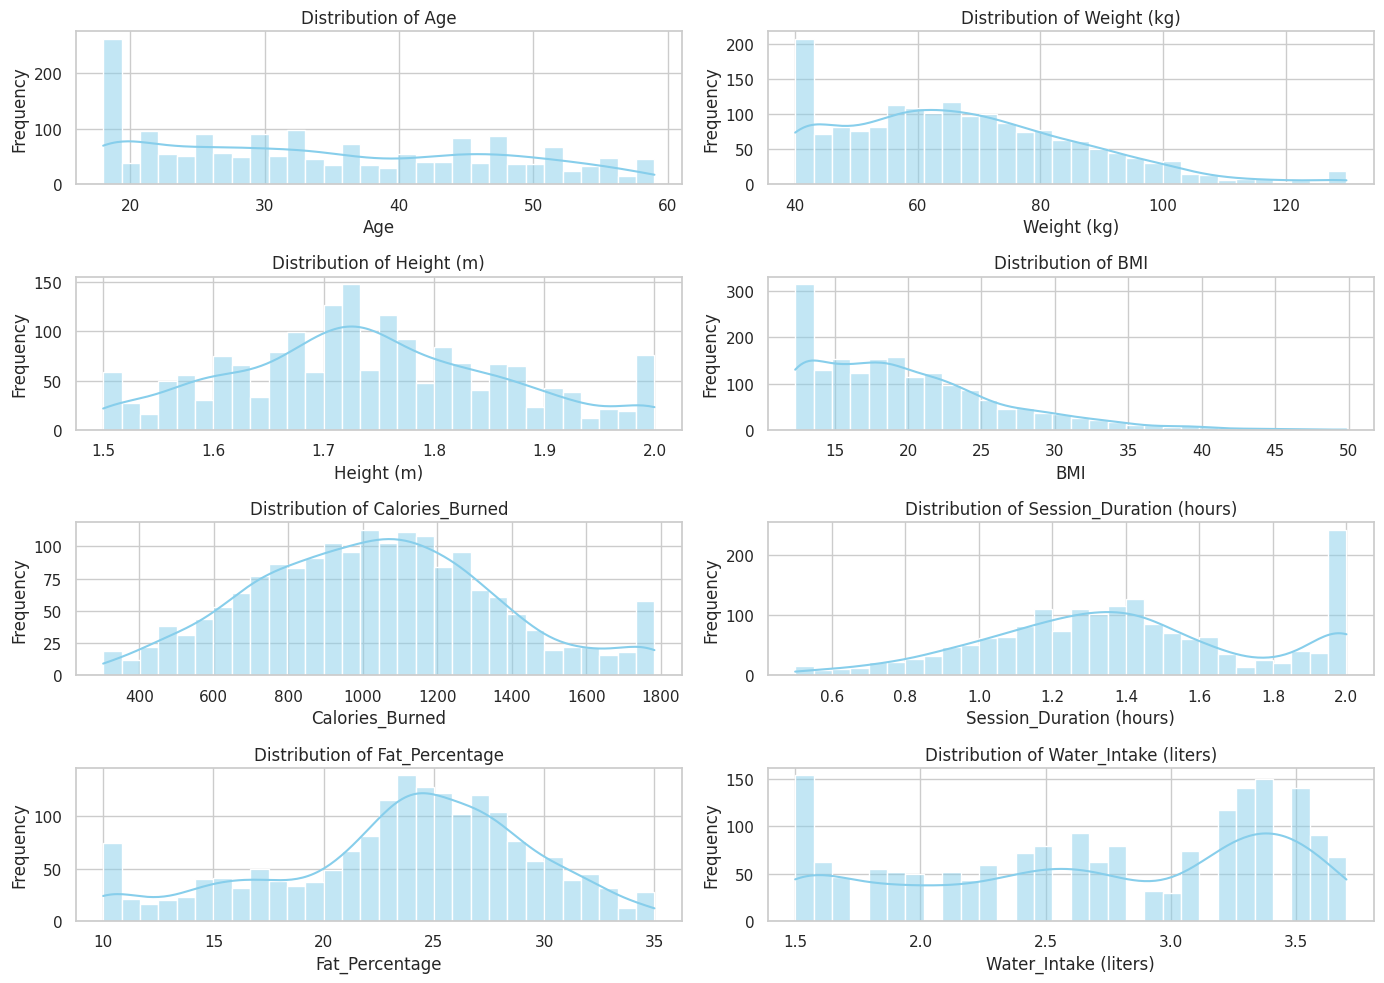

In [9]:
# Distribution of numerical features
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(14, 10))

num_features = [
    "Age", "Weight (kg)", "Height (m)", "BMI", "Calories_Burned",
    "Session_Duration (hours)", "Fat_Percentage", "Water_Intake (liters)"
]

for i, feature in enumerate(num_features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data[feature], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



**Age, Weight, and BMI show right-skewed distributions, indicating a concentration in the lower ranges.Calories_Burned: A wide range with a peak near 1,000 calories.Session_Duration: Most users work out between 1–1.5 hours per session.**


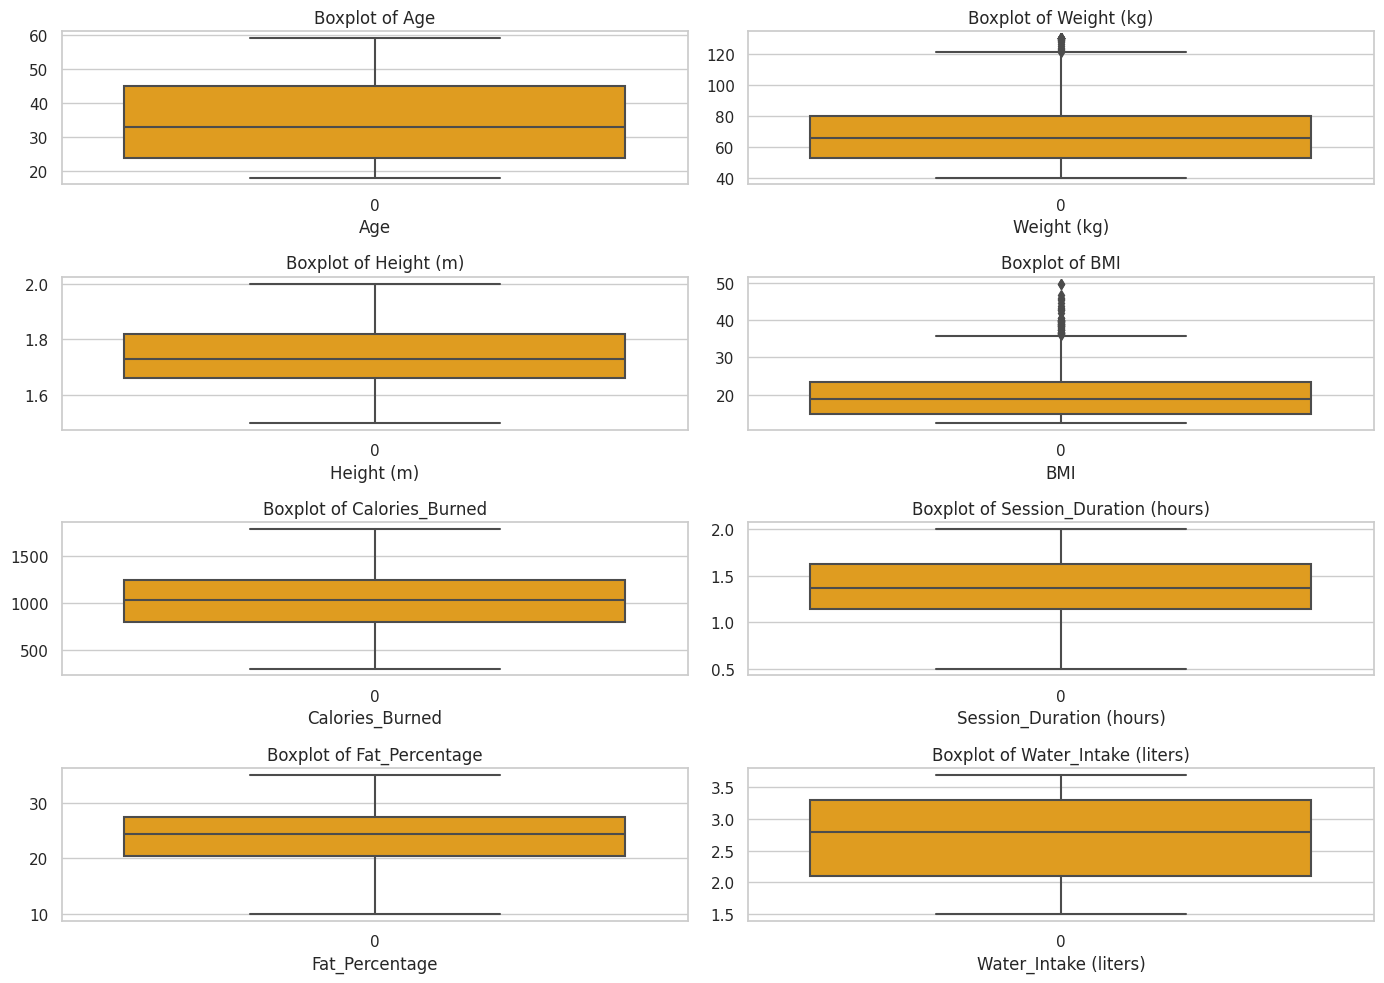

In [10]:
# Boxplots for detecting outliers
plt.figure(figsize=(14, 10))

for i, feature in enumerate(num_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=data[feature], color="orange")
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

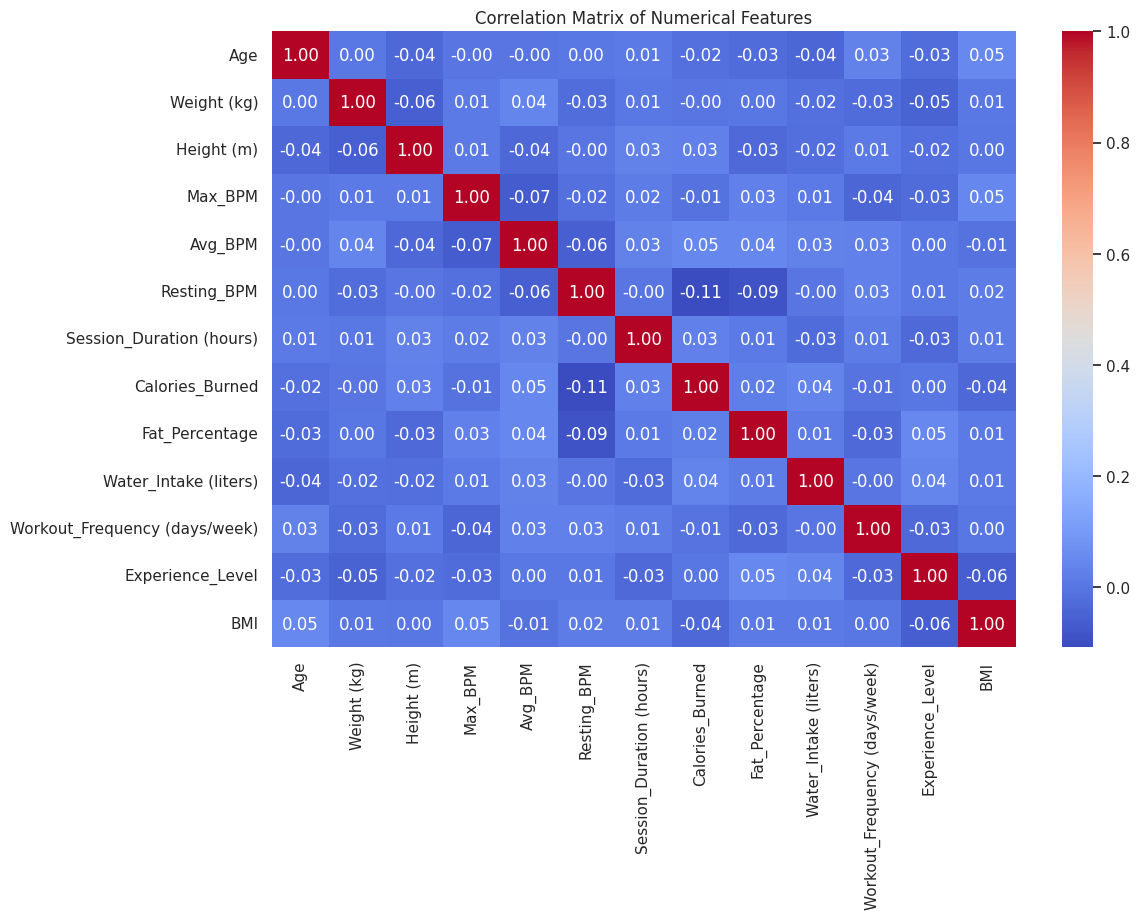

In [11]:
# Correlation heatmap
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


**Calories_Burned strongly correlates with Session_Duration and Avg_BPM, which is expected since longer and more intense workouts burn more calories.BMI correlates moderately with Fat_Percentage and Weight.Weak correlations exist between Age and most other variables.**


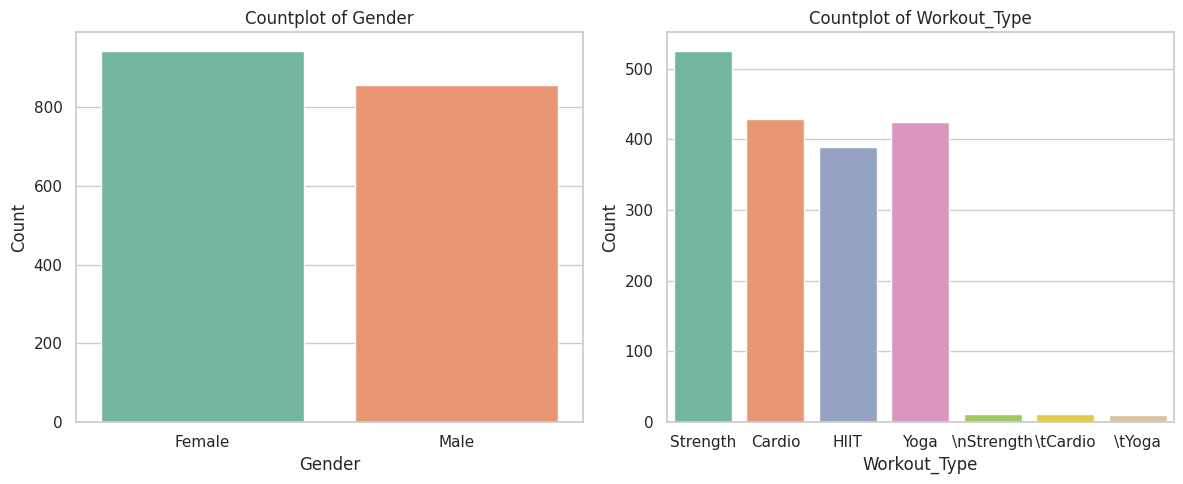

In [12]:
# Categorical data distributions
categorical_features = ["Gender", "Workout_Type"]
plt.figure(figsize=(12, 5))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=data, x=feature, palette="Set2")
    plt.title(f"Countplot of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


**Gender Distribution:Fairly balanced between male and female participants.**



**Workout_Type:Most participants engage in either strength training or cardio**


# **Decsision Tree Model**

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [14]:
# Define target variable and features
target = "Calories_Burned"
features = data.drop(columns=[target, "Gender", "Workout_Type"])  # Drop target and categorical columns

X = features  # Features
y = data[target]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#  Model Training 
# Initialize Random Forest Regressor
dt_model = DecisionTreeRegressor(random_state=38)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=38)

In [16]:
# Model Evaluation
# Make predictions

y_pred = dt_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 204708.59
Root Mean Squared Error: 452.45
R² Score: -1.03


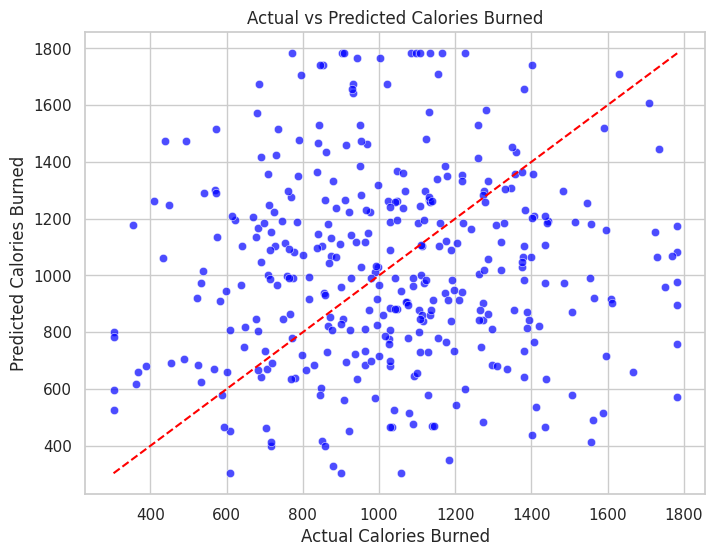

In [17]:
# Visualization

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.title("Actual vs Predicted Calories Burned")
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.show()


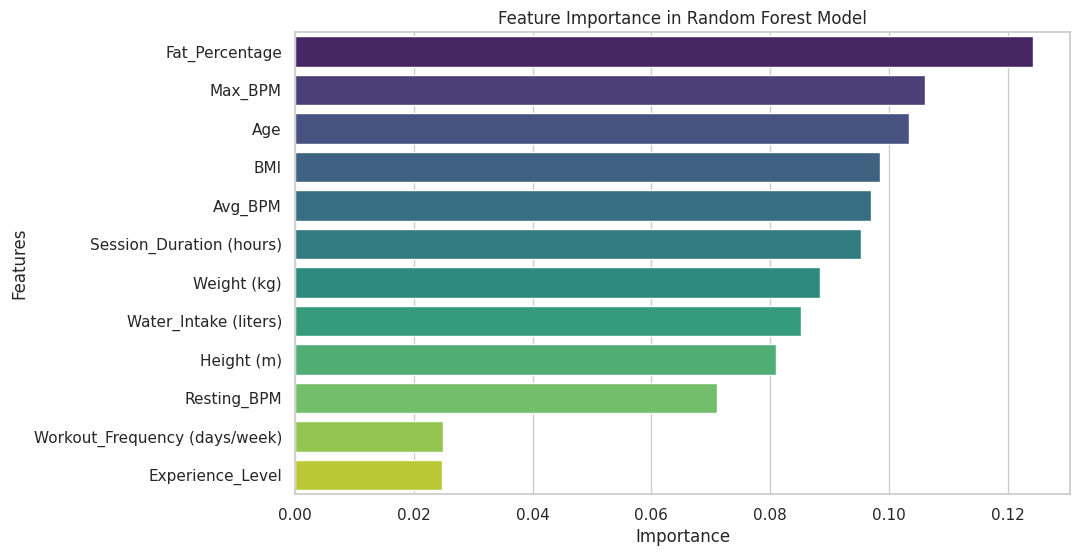

In [18]:
# Feature Importance Plot
feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()